# Pré-processamento

Nesta primeira parte aprenderemos como utilizar o Pandas para realizar algumas operações de pré-processamento.

## Carregando as Bibliotecas necessárias

Para importar as bibliotecas utilizando Python use
```
import <biblioteca> as <nome escolhido>
```

In [1]:
import numpy as np
import pandas as pd

## Carregando os dados para a memória

O Pandas é capaz de ler arquivos em diferentes formatos, dentre eles o mais utilizado é o `csv` (por meio da função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) mas outros formatos como `.xlsx` e `.ftr` podem ser lidos.

In [2]:
data = pd.read_csv('./sample_data/california_housing_train.csv')

Os dados contidos no arquivo especificado: `california_housing_train.csv` são carregados para a memória em um objeto chamado **DataFrame**. Uma vez que eles foram carregados para esse objeto é possível utilizar as funções do Pandas para fazer a manipulação dos dados.


DataFrame é um objeto que armazena os dados na forma de uma tabela. Cada uma das suas colunas corresponde à uma **Série** que pode ser acessada individualmente pelas funções do Pandas. Cada uma das linhas do DataFrame está associado a um **indice** que pode ser utilizado selecionar subconjuntos de amostras de modo a "filtrar" as amostras do DataFrame.


Para ler arquivos de dados de outros formatos a convenção do Pandas é utilizar a função `pd.read_<extensao do arquivo>()`. Por exemplo, para ler um arquivo excel (`.xlsx`) utilize `pd.read_excel()`, para mais informações acesse [a documentação do Pandas sobre `read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

## Análise Exporatória

Para a análise exploratória vamos utilizar as funções do Pandas para obter informações sobre os dados assim como a relações entre os atributos e as suas distribuições.

### Exibindo as linhas do DataFrame

Para exibir as *primeiras* linhas utilize a função `.head()`, para exibir as *últimas* linhas use `.tail()`:

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [6]:
data.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


### Verificando as Colunas do DataFrame

Para verificar os nomes das colunas assim como tipo de cada uma das séries no DataFrame use `.info()`. Esse método do DataFrame informará não apenas os nomes dos atributos mas também os tipos de cada um deles, a quantidade de valores não nulos e a quantidade de momória que o DataFrame ocupa enquanto os dados estiverem na memória RAM.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Para obter uma descrição dos valores de cada uma das colunas (*features*) do DataFrame utilize `.describe()`:

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Para verificar apenas o número de linhas e colunas no DataFrame utilize `.shape` (sem os parênteses). Essa variável pertencente ao DataFrame indica o número de linhas e colunas, respectivamente, relacionados ao DataFrame. Por exemplo:

In [9]:
data.shape

(17000, 9)

Neste caso o primeiro elemento da tupla corresonde ao número de linhas do DataFrame e o segundo corresponde ao número de colunas do DataFrame. Esse atributo pode ser acessado como se fosse uma tupla do Python: `data.shape[1]` ou `data.shape[0]`.

### Contando Valores Nulos no DataFrame

Uma maneira de contar a quantidade de valores faltantes no DataDrame é utilizar:

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Algo importante a se notar é que essa função não detecta valores inseridos na tabela, mas que correspondem à valores nulos, por exemplo, -9999 ou a String "null". Esses valores precisam ser observados e removidos manualmente.

### Correlação entre o Atributo Meta e os Demais Atributos

Para verificar a correlação entre atributos utilize a seguinte sintaxe:

```
data.corr()['atributo_meta']
```
**Explicação**: o Pandas possui um método `.corr()` que é utilizado para calcular a matriz de correlação de todos-para-todos os atributos no DataFrame `data`. Esse método retorna um outro DataFrame com os valores das correlaões, ao utilizarmos `['atributo_meta]` estamos acessando a **série** desse DataFrame associada ao atributo meta com os valores das correlações entre os demais atributos e o atributo meta. Outra forma de fazer a mesma coisa seria: 
```
matriz_de_correlacao = data.corr()
matriz_de_correlacao['atributo_meta']
```

In [11]:
data.corr()['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

Podemos ordenas essa série utilizando o método `.sort_values()`da seguinte forma:

In [12]:
matriz_de_correlacao = data.corr()

# para inverter a order de ordenação é possivel utilizar o parâmetro 'ascending':
# .sort_values(ascending = False)
matriz_de_correlacao['median_house_value'].sort_values()

latitude             -0.144917
longitude            -0.044982
population           -0.027850
total_bedrooms        0.045783
households            0.061031
housing_median_age    0.106758
total_rooms           0.130991
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Contando Valores Diferentes em cada Feature

As vezes é interessante descobrir quais são os valores presentes em um atributo. Por exemplo, poderíamos contar a quantidade de casas por distrito e quantas vezes cada um dos valores ocorrem. Para fazer isso utilizamos a função `.value_counts()`. No exemplo da quantidade de quartos iremos acessar a série `households`:

In [13]:
data['households'].value_counts()

306.0     48
386.0     48
282.0     47
330.0     46
426.0     45
          ..
1445.0     1
2232.0     1
1513.0     1
3744.0     1
1386.0     1
Name: households, Length: 1740, dtype: int64

Neste caso vemos que 48 distritos diferentes tem 306 casas cada, e assim por diante... Esse método é mais útil com atributos categóricos, mas também pode ser utilizado com valores numéricos.

## Contando Valores Diferentes em cada Atributo

As vezes é interessante verificarmos a quantidade de valores diferentes em um atributo. Por exemplo, no caso de um atributo que tem todos os valores iguais não haverá nenhuma informação que o modelo pode aprender a partir desse *feature*.

Para verificar a quantidade de valores diferentes em cada atributo (numéricos ou categóricos) devemos utilizar o método `.nunique()` da seguinte forma:


Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [14]:
data.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

No caso de algum dos atributos apresentar valor 1 haverá apenas um valor diferente dentre os valores presentes nesse atributo, ou seja, esse valor é igual para todas as amostras. Nesse caso, podemos remover o atributo mesmo sem consultar o especialista.

### Análise Gráfica

Os métodos utilizados para gerar gráficos no Pandas são acessados da seguinte maneira:

```
data.plot.<tipo do grafico>( argumentos... )
```

A seguir vamos ver alguns dos tipos mais comuns de gŕficos que podem ser utilizados para visualizar os dados contidos no DataFrame

#### Histograma

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

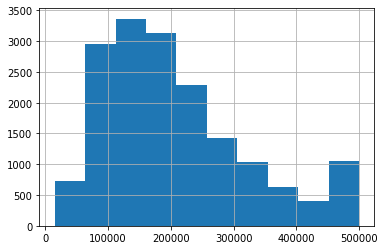

In [15]:
data['median_house_value'].hist()

Podemos também verificar as **distribuições** de todos os atributos no dataframe utilizando o método `.hist()` sem especificar a série desejada:

O argumento `figsize` é utilizado apenas para aumentar o tamanho do plot (o plot gerado com o tamanho padrão era de difícil visualização).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d7c887110>,
      dtype=object)

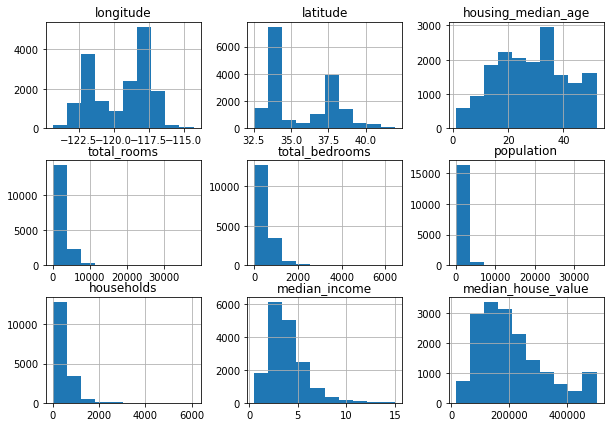

In [16]:
data.hist(figsize = (10, 7))

#### Dispersão

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

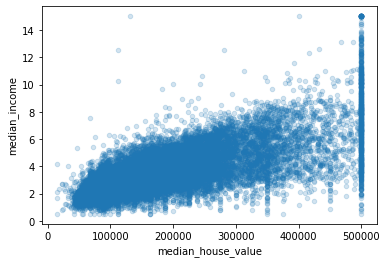

In [17]:
data.plot.scatter(x = 'median_house_value',
                  y = 'median_income',
                  alpha = 0.2)

Para o gráfico de dispersão, outros argumentos podem ser utilizados para produzir os gráficos. Por exemplo, podemos fazer o seguinte:

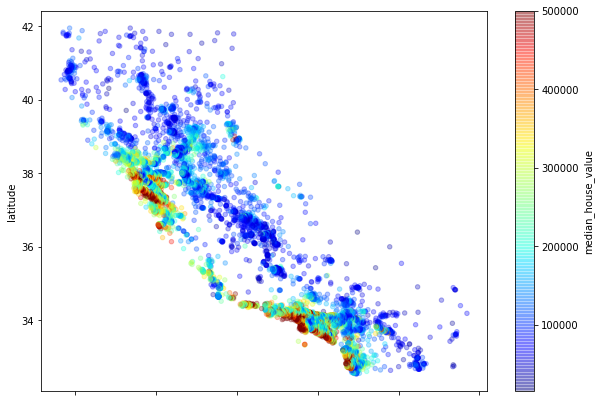

In [18]:
data.plot.scatter(
    x = 'longitude',            # série para o eixo x
    y = 'latitude',             # série para o eixo y
    figsize = (10, 7),          # tamanho da figura produzida
    alpha = 0.3,                # opacidade dos pontos na figura
    c = 'median_house_value',   # cor dos pontos
    cmap = 'jet',               # colormap a ser utilizado pelos valores passados em `c
)

#### Boxplot

O método responsável por fazer os boxplots no Pandas (por uma inconsistência da API) é acessado de maneira diferete dos demais:

```
data.boxplot(column = <nome do atributo>)
```

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

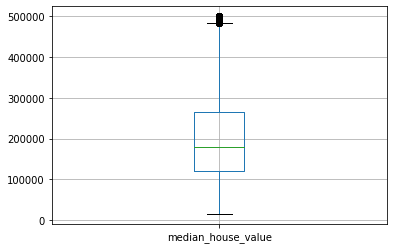

In [19]:
data.boxplot(column = 'median_house_value')

Note que mais valores podem ser passados para o método `.boxplot()` no argumento `column`. Nesse caso podemos passar uma lista de atributos para os quais desejamos os Boxplots da seguinte forma (a única ressalva é que todos os boxplots ficam com a mesma escala no eixo y:

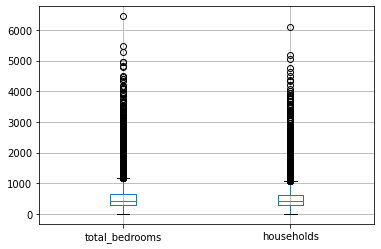

In [20]:
data.boxplot(column = ['total_bedrooms', 'households'])

## Manipulação dos Dados

O esquema de manipulação dos dados no Pandas segue a mesma lógica da utilização das séries. As transformações mais utilizadas costumam ser:

- filtragem
- remoção de colunas
- seleção de colunas
- criação de novas colunas a partir das já existentes
- aplicar funções a colunas

### Seleção de Colunas e Linhas

Para realizar a seleção de colunas e linhas o Pandas disponibiliza as funções `.loc[]` e `.iloc[]`.

Estas funções permitem linhas e colunas específicas (ou subconjuntos de linhas e colunas) sejam selecionadas. A diferença entre elas é que
- `.loc[]` utiliza os nomes os atributos por extenso durante a seleção enquanto 
- `.iloc[]` utiliza **indices** dos atributos. 

Ambas as funções devem ser utilizadas da seguinte forma:
```
data.loc[ <seletor de linhas>, <seletor de colunas> ]
```

Veja o exemplo:

In [21]:
# selecionando todas as colunas das linhas 1, 2, e 3
data.loc[[1,2,3], :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0


Quando algum dos seletores não é especificado (por meio do `:`) o Pandas vai selecionar todas as linhas/colunas 

In [22]:
# selecionando todas as linhas dos atributos 'median_house_value' 
# e ´households´
data.loc[:, ['median_house_value', 'households']]

,median_house_value,households
0,66900.0,472.0
1,80100.0,463.0
2,85700.0,117.0
3,73400.0,226.0
4,65500.0,262.0
...,...,...
16995,111400.0,369.0
16996,79000.0,465.0
16997,103600.0,456.0
16998,85800.0,478.0


Repare que tivemos que escrever os nomes dos atributos por extenso para usarmos a função `.loc[]`. Se tentássemos utilizá-la com números (em que cada número simbilizaria um dos atributos) ela não funcionaria:

In [23]:
#
# esta célula irá produzir um erro!!
#
try:
    data.loc[:, [1, 2, 3]]
except KeyError as e:
    print(e)

"None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"


Quanto queremos selecionar os atributos utilizando números temos que utilizar o `.iloc[]`.

Note que os números passados **dependem da ordem em que os atributos aparecem no DataFrame**:

In [24]:
# note que em python o primeiro elemento tem indice 0!
# por isso o atributo 'longitude' é pulado
print(data.columns)

# selecionando todas as linhas dos atributos 1, 2, 3
# na ordem em que eles aparecem no DataFrame
data.iloc[:, [1, 2, 3]]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


,latitude,housing_median_age,total_rooms
0,34.19,15.0,5612.0
1,34.40,19.0,7650.0
2,33.69,17.0,720.0
3,33.64,14.0,1501.0
4,33.57,20.0,1454.0
...,...,...,...
16995,40.58,52.0,2217.0
16996,40.69,36.0,2349.0
16997,41.84,17.0,2677.0
16998,41.80,19.0,2672.0


Outra forma de selecionarmos atributos é utilizando o nome do atributo dentro de `[ ]` da seguinte forma: 

In [25]:
# selecionando a série correspondente ao atributo 
# 'median_house_value':
data['median_house_value']

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

Note que essa abordagem faz com que uma **série** seja retornada pelo Pandas. 

Uma limitação dessa forma é que só é possível selecionar uma série por fez. Se fizéssemos algo do tipo:
```
data['atributo1', 'atributo2']
```
o Pandas retornaria um erro informando que não é possível retornar uma série com 2 atributos.

Uma forma de contornar esse problema é utilizar dois colchetes da seguinte forma:
```
data[['atributo1', 'atributo2']]
```
mas desta forma um **DataFrame** é retornado ao invés de uma série.

Ambas as formas são válidas e podem ser usadas conforme a necessidade.

### Utilização de Funções em Colunas

Agora que já aprendemos a selecionar colunas específicas podemos utilziar funções do Pandas para calcular valores estátisticos sobre essas séries:

In [26]:
# calculando a média do atributo 'median_house_value':
print( data['median_house_value'].mean() )

# calculando a moda do atributo 'housing_median_age'
print( data['housing_median_age'].mode() )

# calculando o desvio padrão do atributo 'total_bedrooms'
print( data['total_bedrooms'].std() )

# obtendo o menor valor do atributo 'median_house_value'
print( data['median_house_value'].min() )

207300.91235294117
0    52.0
dtype: float64
421.49945157986514
14999.0


Para outras funções disponíveis no Pandas acesse:

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats

### Filtragem

Para realizar a filtragem dos DataFrames vamos utilizar algo chamado de **máscara**. Considere o seguinte exemplo:

Queremos encontrar todas as amostras (linhas da tabela) que tem o valor do atributo `households` estritamente maior que 300

In [27]:
data['households'] > 300

0         True
1         True
2        False
3        False
4        False
         ...  
16995     True
16996     True
16997     True
16998     True
16999    False
Name: households, Length: 17000, dtype: bool

Repare que esta operação retornou uma **série** com a mesma quantidade de linhas que o DataFrame. Cada um dos valores dessa série tem ou o valor `True` ou o valor `False`. Esta série é denominada **máscara** (ou filtro). 

Note que ela apenas indica quais linhas devem ser selecionadas (`True`) e quais não devem ser selecionadas (`False`), mas ela não realiza a seleção diretamente. Para fazer a seleção devemos utilizar esse filtro junto com a função `.loc[]`:

In [28]:
# obtendo filtro para as amostras que tem o valor do
# atributo ´households' estritamente maior que 150
filtro = data['households'] > 300

# utilizando o filtro para selecionar todas as linhas que 
# atendem as condições de seleção
selecionado = data.loc[filtro, :]
print(selecionado)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
6        -114.58     33.61  ...         2.6768             82400.0
8        -114.59     33.61  ...         2.1782             58400.0
10       -114.60     33.62  ...         2.6797             86500.0
...          ...       ...  ...            ...                 ...
16993    -124.23     40.54  ...         3.0806            106700.0
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0

[12109 rows x 9 columns]


Para multiplas condições durante a seleção é possível utilizar os operadores lógicos:

- `&` E
- `|` OU
- `!` NÃO

Por exemplo, vamos selecionar todas as amostras que tem o valor do atributo `households` maior que 500 e o atributo `median_income` maior que 3.

In [29]:
filtro = (data['households'] > 200) & (data['median_income'] > 3.0)

# podemos utilizar o value_counts() para ver quantos 
# valores seriam selecionados:
print(filtro.value_counts())

selecionado = data.loc[filtro, :]
print(selecionado)

True     9777
False    7223
dtype: int64
       longitude  latitude  ...  median_income  median_house_value
3        -114.57     33.64  ...         3.1917             73400.0
5        -114.58     33.63  ...         3.3438             74000.0
13       -114.61     34.83  ...         3.2120             70400.0
26       -115.37     32.82  ...         3.5735             71100.0
65       -115.54     32.99  ...         4.3523             96000.0
...          ...       ...  ...            ...                 ...
16976    -124.17     40.75  ...         4.8516            116100.0
16986    -124.19     40.73  ...         3.5363             90100.0
16993    -124.23     40.54  ...         3.0806            106700.0
16997    -124.30     41.84  ...         3.0313            103600.0
16999    -124.35     40.54  ...         3.0147             94600.0

[9777 rows x 9 columns]


Note que agora podemos combinar as funções mostradas na seção  anterior com os DataFrames obtidos a partir das filtragens feitas nessa seção.

Por exemplo, podemos calcular a média do atributo `median_house_value` quando o atributo `median_income` é maior que 4 e ou o atributo `households` é maior que 500:

In [30]:
filtro = (data['households'] > 500) | (data['median_income'] > 4)

selecionado = data.loc[filtro, :]

# preço médio levando em consideração as duas condições acima
print( selecionado['median_house_value'].mean() )

245325.5471446277


Podemos também utilizar as funções específicas para cálculos nos séries dentro de condições de filtragem:

In [31]:
# selecionando todas as amostras que tem o valor do atributo
# 'median_house_value' acima da média
filtro = data['median_house_value'] > data['median_house_value'].mean()

selecionado = data.loc[filtro, :]
print(selecionado)

       longitude  latitude  ...  median_income  median_house_value
172      -116.26     33.65  ...        10.2948            382400.0
187      -116.33     33.72  ...         7.4382            353100.0
193      -116.37     33.69  ...         7.8005            318100.0
199      -116.38     33.71  ...         4.5556            258100.0
203      -116.39     33.69  ...         6.9833            238800.0
...          ...       ...  ...            ...                 ...
16802    -123.17     39.18  ...         5.9585            214900.0
16854    -123.49     38.70  ...         3.3125            295400.0
16865    -123.70     39.32  ...         3.1071            213200.0
16879    -123.81     39.34  ...         3.1563            277000.0
16880    -123.81     39.31  ...         3.3654            225000.0

[6891 rows x 9 columns]


### Remoção de Colunas

Para remover uma coluna do DataFrame basta utilizar o método `.drop()`

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [32]:
# criando uma copia do DataFrame apenas para não perdermos as informações
copia = data.copy()

# removendo da cópia os atributos 'median_income' e 'total_rooms'
copia.drop(columns = ['median_income', 'total_rooms'], inplace = True)

print("antes de remover os atributos:")
print(data.info())

print("depois de remover os atributos:")
print(copia.info())

antes de remover os atributos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
depois de remover os atributos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null

### Criação de Colunas

Novas colunas podem ser criadas no DataFrames a partir das já existentes.

Por exemplo, vamos utilizar os atributos `households` (total de casas no distrito) e `total_rooms`(total de cômodos por distrito) para criar o atributo `rooms_per_house` indicando a quantidade de cômodos em cada casa. Para fazer isso utilizamos:

In [33]:
# criando a nova coluna a partir de duas colunas já existentes
data['rooms_per_house'] = data['total_rooms'] / data['households']

# verificando novamente a correlação entre os atributos no 
# DataFrame e o atributo alvo.
data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691871
rooms_per_house       0.150081
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

### Salvando o DataFrame para Memória

Depois de realizar todas as transofrmações no DataFrame é interessante salvar uma cópia dos dados. Isso normalmente é bastante útil quando são necessárias muitas operações (ou operações muito lentas) nos dados. Desta forma é possível salvar tempo apenas carregando o dataframe já pré-processado para a etapa de normalização.

Para salvar o DataFrame no formato `.csv` utilize:

In [34]:
data.to_csv('dados_salvos.csv', index = False)

Nesse caso, o argumento `index = False` indica que o índice do DataFrame não será salvo no arquivo especificado. Nesta situação o Pandas reconstroi o ìndice toda vez que esse conjunto de dados que foi salvo é carregado para a memória; caso contŕaio o índice é reaproveitado no momento de carregar os dados.

Para mais informações acesse: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

## Normalização

Para realizar a normalização iremos importar o Scikit-Learn, para fazer isso basta utilizar o código abaixo:

In [35]:
import sklearn

# importando o objeto normalizador que deve ser utilizado na normalização
from sklearn.preprocessing import MinMaxScaler

# importando a função responsável por separar os dados em teste e treinamento
from sklearn.model_selection import train_test_split

### Separação entre Dados e Alvo

Neste momento vamos fazer a separação dos dados em

- Atributos de treinamento (dados)
- Atributo alvo (target)

cada qual com as duas duas divisões: treinamento e teste.

Sabemos que o atributo meta é o `median_house_value`, assim podemos separar o dataframe da seguinte forma:

In [36]:
target = data['median_house_value']
data = data.drop(columns = ['median_house_value'])

print(target.head())
print(data.head())

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64
   longitude  latitude  ...  median_income  rooms_per_house
0    -114.31     34.19  ...         1.4936        11.889831
1    -114.47     34.40  ...         1.8200        16.522678
2    -114.56     33.69  ...         1.6509         6.153846
3    -114.57     33.64  ...         3.1917         6.641593
4    -114.57     33.57  ...         1.9250         5.549618

[5 rows x 9 columns]


### Separação entre Treinamento e Teste

Neste momento vamos utilizar *Holdout* definindo como porcentagem de separação 80% para treinamento e 20% para teste.

Para tal, iremos utilizar a função `train_test_split()` do Scikit-Learn:

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [37]:
# muita atenção na ordem dos 'xtrain', 'xtest' ....
#
#  o primeiro argumento é o DataFrame contendo os dados de treinamento
#  o segundo argumento é o DataFrame contendo o(s) atributo(s) alvo(s)
# 'train_size' é o tamanho do conjunto de treinamento, 80% neste exemplo
# 'shuffle' especifica se os conjuntos devem ser embaralhados
#       depois de separados. Normalmente é uma boa prática.
#
xtrain, xtest, ytrain, ytest = train_test_split(data,target,
                                                train_size = 0.8,
                                                shuffle = True)

print(xtrain)
print(ytrain)

       longitude  latitude  ...  median_income  rooms_per_house
6311     -118.25     33.94  ...         2.3333         4.689103
2309     -117.45     33.94  ...         2.1023         4.119907
3859     -117.95     33.93  ...         3.4702         4.593333
4053     -117.97     33.76  ...         4.0508         4.962319
7586     -118.37     34.20  ...         2.8917         4.699346
...          ...       ...  ...            ...              ...
14754    -122.20     39.15  ...         3.1250         7.238095
470      -116.98     33.93  ...         2.1581         4.272727
16546    -122.67     38.33  ...         3.9518         5.472542
276      -116.67     32.97  ...         5.3590         8.116279
11669    -121.30     38.70  ...         3.2350         5.770260

[13600 rows x 9 columns]
6311      99800.0
2309     103700.0
3859     161900.0
4053     183900.0
7586     170400.0
           ...   
14754    108000.0
470       68300.0
16546    220300.0
276      193800.0
11669    124700.0
Name: me

### Utilização dos Objetos Normalizadores

Uma fez que os dados já foram separadados da forma adequada podemos processuir para a etapa de normalização. 

Inicialmente iremos *instanciar* dois objetos normalizadores: uma para os dados e outro pra o atributo alvo:

In [38]:
# lembre-se que importamos o MinMaxScaler do Scikit-Learn
transf_dados = MinMaxScaler()
transf_alvo = MinMaxScaler()

Em seguida iremos utilizar método `fit_transform()` do objeto `MinMaxScaler`.

Esse método é responsável por obter os valores necessários para a normalização dos valores dos atributos ('etapa' `fit` da função) e logo em seguida já realizar a transformação da escala dos dados segundo esses valores ('etapa' `transform` da função).

Depois que essa função é executada os dados terão sido normalizados e os objetos transformadores estarão prontos para normalizar novos dados no futuro.

In [39]:
norm_xtrain = transf_dados.fit_transform(xtrain)
norm_ytrain = transf_alvo.fit_transform(ytrain.values.reshape(-1, 1))

norm_xtest = transf_dados.transform(xtest)
norm_ytest = transf_alvo.transform(ytest.values.reshape(-1, 1))

Repare em 2 coisas:

1. o processo de `fit` dos transformadores de escala (normalizadores) foi feito utilizando apenas os dados de treinamento
2. Para o atributo alvo foi necessário utilizar `y.values.reshape(-1, 1)`. Isso ocorre por que o objeto normalizador está esperando uma Matriz mas como é passado apenas uma série o normalizador não consegue determinar qual método utilizar. Nessa situação é lançado um erro que informa que caso o conjunto de dados tenha apenas um atributo, os seus valores devem ser transformados utilizando o `.reshape{-1, 1)` para que ele possa ter o formato esperado pelo objeto.

In [40]:
# podemos verificar que os dados foram corretamente normalizados:
print(norm_ytest)
print(norm_xtest)

print(norm_xtrain.shape)
print(norm_ytrain.shape)

[[0.29299054]
 [0.0709296 ]
 [0.67546319]
 ...
 [0.14948598]
 [0.53876273]
 [0.32721721]]
[[0.60121457 0.18172157 0.33333333 ... 0.13404605 0.18816982 0.02193983]
 [0.4645749  0.44739639 0.66666667 ... 0.07878289 0.07964718 0.02663034]
 [0.60526316 0.1424017  0.39215686 ... 0.02565789 0.34714004 0.03539947]
 ...
 [0.45850202 0.40170032 0.33333333 ... 0.02828947 0.10809506 0.03042619]
 [0.60121457 0.15515409 0.33333333 ... 0.07467105 0.16785286 0.01232995]
 [0.74595142 0.02125399 0.45098039 ... 0.02746711 0.30542337 0.03303505]]
(13600, 9)
(13600, 1)


# Exemplo

Neste exemplo iremos utilizar os dados do conjunto Iris. Esse conjunto é bastante utilizado para testes e demonstrações das técnicas de aprendizado de máquina por ser de fácil compreensão e bastante leve.



## Geração dos Dados Ruidosos

Não é necessário entender 100% desta parte, o essencial é que o dataset 'iris' está sendo carregado para um DataFrame e que esse DataFrame está sendo modificado para que valores ruidosos sejam adicionados artificialmente apenas para verificar as tratamentos que realizar nessas amostras ruidosas.

In [41]:
import pandas as pd
import numpy as np

from sklearn import datasets
from random import randint

# carregando o conjunto de dados 'Iris'
loaded_iris = datasets.load_iris()

iris_data = pd.DataFrame(loaded_iris['data'])
iris_target = pd.DataFrame(loaded_iris['target'])

iris = pd.concat((iris_data, iris_target), axis = 1)

feature_names = loaded_iris['feature_names']
feature_names.append('target')

iris.columns = feature_names


#
# introduzindo insonconsistencias artificialmente
#

# duplicando 10 amostras escolhidas aleatoriamente
for i in range(10):
    iris = iris.append( iris.loc[randint(0, iris.shape[0]-2), :] )

iris.reset_index(inplace = True, drop = True)


# adicionando valores NA aleatoriamente nas amostras (tanto nos dados quanto no alvo)
for i in range(12):
    row = randint(0, iris.shape[0] - 1)
    col = randint(0, iris.shape[1] - 1)
    iris.iat[row, col] = np.nan

iris.reset_index(inplace = True, drop = True)


# adicionando 5 amostras redundantes aleatoriamente
for i in range(5):
    
    sample = iris.loc[randint(0, iris.shape[0]-1), :]
    target = sample['target']

    while target == sample['target']:
        target = randint(0, 2)

    sample['target'] = target

    iris = iris.append(sample)

iris.reset_index(inplace = True, drop = True)


# adicionando valores absurdos nos atributos (valores negativos para comprimenento)
for i in range(7):
    row = randint(0, iris.shape[0] - 1)
    col = randint(0, iris.shape[1] - 2) # -2 para excluir o 'target'
    iris.iat[row, col] = -(iris.iat[row, col])
    
iris.reset_index(inplace = True, drop = True)

In [42]:
iris.tail(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
150,6.1,2.8,4.0,1.3,1.0
151,6.3,3.4,5.6,2.4,2.0
152,5.5,4.2,1.4,-0.2,0.0
153,6.5,3.0,NaN,2.2,2.0
154,7.7,3.0,6.1,2.3,2.0
155,5.6,3.0,4.5,1.5,1.0
156,6.7,3.0,5.2,2.3,2.0
157,5.7,2.9,4.2,1.3,1.0
158,4.3,3.0,1.1,0.1,0.0
159,5.0,3.2,1.2,0.2,0.0


## Valores Faltantes

Neste momento temos um DataFrame com as informações sobre o conjunto Iris que possui informaçãoes faltantes. Podemos verificar isso da mesma forma que foi utilizada anteriormente:

In [43]:
iris.isna().sum()

sepal length (cm)    3
sepal width (cm)     2
petal length (cm)    3
petal width (cm)     0
target               4
dtype: int64

Note que como os valores são atribuídos aleatoriamente as quantidades em cada um dos atributos irá variar a cada vez que a célula for executada.

## Padronização dos Nomes dos Atributos

Para realizar a padronização iremos acessar o atributo `.columns` do DataFrame `iris`. Esse atributo possí os nomes de todos os atributos do DataFrame. Iremos remover os `(cm)`s assim como os espaços entre os nomes:

In [44]:
print("nomes dos atributos antes: ", *iris.columns)

features = [feature.replace(' (cm)', '').replace(' ', '_') for feature in iris.columns]

print('nomes dos atributos depois: ', *features)

iris.columns = features


iris.tail()

nomes dos atributos antes:  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm) target
nomes dos atributos depois:  sepal_length sepal_width petal_length petal_width target


,sepal_length,sepal_width,petal_length,petal_width,target
160,6.9,3.1,4.9,1.5,0.0
161,5.1,3.5,1.4,0.2,1.0
162,6.7,3.0,5.0,1.7,2.0
163,6.2,2.9,4.3,1.3,0.0
164,5.4,3.9,1.7,0.4,2.0


## Tratamento das Amostras Ruidosas e Inconsistentes

### Amostras Duplicadas ou Ambíguas

Para tratar os dados do conjunto iremos primeiro verificar a existência de amostras duplicadas. Para fazer isso utilizamos o método `.duplicated`:

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [45]:
# removendo o atributo 'meta' do subconjunto (explicação em breve...)
features = iris.columns.to_list()
features = features.remove('target')

# obtendo um filtro com apenas as amostras duplicadas
duplicated_filter = iris.duplicated(subset = features)

# mostrando apenas a segunda ocorrencia das amostras duplicadas
iris.loc[ duplicated_filter, :]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2.0
150,6.1,2.8,4.0,1.3,1.0
151,6.3,3.4,5.6,2.4,2.0
154,7.7,3.0,6.1,2.3,2.0
155,5.6,3.0,4.5,1.5,1.0
157,5.7,2.9,4.2,1.3,1.0
158,4.3,3.0,1.1,0.1,0.0
159,5.0,3.2,1.2,0.2,0.0
160,6.9,3.1,4.9,1.5,0.0
161,5.1,3.5,1.4,0.2,1.0


As amostras obtidas pelo método `.duplicated()` são aquelas que ou são redundantes (duas linhas idênticas no conjunto de dados) ou apresentam ou amostras ambíguas (todos os atributo são iguais mas os valores do atributo meta são diferentes). Nesse caso podemos remover todas esses amostras utilizando o método `.drop_duplicates()`:

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [46]:
# removendo o atributo 'meta' do subconjunto (explicação em breve...)
features = iris.columns.to_list()
features = features.remove('target')

iris = iris.drop_duplicates(subset = features)

Por que foi utilizado um subconjunto de atributos e não todos os atributos?

**Explicação:** Se utilizarmos como subconjunto todos os atributos de treinamento quando executarmos `.duplicated()` o DataFrame obtido irá compreender tanto as amostras ambíguas quanto as amostras duplicadas. Como devemos remover ambos os problemas do conjunto de dados podemos "matar dois coelhos com uma cajadada só" utilizando o atributo `subset = ...` na chamada do método.

### Valores Faltantes (NA)

Para resolver o problema dos valores faltantes podemos utilizar duas saídas dependendo da quantidade de dados à disposição:

1. Remover por completo todas as amostras que tenham ao menos um valor faltante em qualquer um dos seus atributos (caso o conjunto de dados tenha uma quantidade grande de amostras à disposição) ou;

2. Realizar o preenchimento dos valores faltantes com base em medidas estatísticas (média, mediana, etc) do atributo faltante em questão.

Por movitos pedagógicos iremos realizar as duas abordagens


#### Removendo Amostras com Atributos Faltantes

Para remover todas as amostras que tenha ao menos um atributo faltantes devemos utilizar o método `.dropna()`.

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [47]:
iris_dropall = iris.copy()


# dataset antes de termos removidos os atributos faltantes
print(iris_dropall.shape)
iris_dropall.isna().sum()

(152, 5)


sepal_length    3
sepal_width     2
petal_length    3
petal_width     0
target          4
dtype: int64

In [48]:
iris_dropall.dropna(inplace = True)

# dataset antes de termos removidos os atributos faltantes
print(iris_dropall.shape)
iris_dropall.isna().sum()

(141, 5)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

Verificamos que o DataFrame agora não contém nenhuma amostra com valores NA. No entanto, o número de amostras disponíveis (tanto para treinamento quanto para teste) foi de 153 para 142.

#### Preenchendo Valores Faltantes

Para preencher os valores faltantes iremos utilizar o objeto `SimpleImputer` do Scikit-Learn da seguinte maneira:

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan,
                        strategy = 'mean')


iris_imputed = iris.copy()
print(iris_imputed.shape)

matriz = imputer.fit_transform(iris)
print(matriz.shape)

iris_imputed = pd.DataFrame(matriz, columns = iris.columns)
iris_imputed.head(15)

(152, 5)
(152, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,1.000000
1,4.9,3.0,1.4,0.2,0.000000
2,4.7,3.2,1.3,0.2,0.000000
3,4.6,3.1,1.5,0.2,0.000000
4,5.0,3.6,1.4,0.2,0.000000
5,5.4,3.9,1.7,0.4,2.000000
6,4.6,3.4,1.4,0.3,0.000000
7,5.0,3.4,1.5,0.2,0.000000
8,4.4,2.9,1.4,0.2,0.000000
9,4.9,3.1,1.5,0.1,0.000000


**Explicação:** primeiro é criado um objeto transformador utilizando `SimpleImputer()`, esse objeto está preenchendo os valores passados para o argumento `missing_values` (nesse caso ele está procurando por valores `np.nan` para serem preenchidos) e está preenchendo esses valores utilizando a **média** de cada um dos atributos (especificado pelo argumento `strategy = 'mean'`. Uma vez que essa transformação ocorre, ou seja, na chamada do método `.fit_transform()`, o conjunto de dados será retornado na forma de uma matriz de pontos que são convertidos novamente para um DataFrame por meio da função `pd.DataFrame(...)`. 

Podemos verificar que a transformação cumpriu a sua função inspecionando os valores falantes:

In [50]:
iris_imputed.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

## Separação entre Treinamento e Teste

Para realizar a separação iremos utilizar, novamente, a função `train_test_split` do modulo `model_selection` do Scikit-Learn:

In [51]:
from sklearn.model_selection import train_test_split

dados = iris.drop(columns = 'target')
meta = iris['target']

xtrain, xtest, ytrain, ytest = train_test_split(dados, meta,
                                                shuffle = True,
                                                train_size = 0.8)

# conjuntos de treinamento
print("Shapes de treinamento: ", xtrain.shape, ytrain.shape)

# conjuntos de teste
print("Shapes de teste: ", xtest.shape, ytest.shape)

Shapes de treinamento:  (121, 4) (121,)
Shapes de teste:  (31, 4) (31,)


## Normalização

Para o processo de normalização iremos utilizar o `StandarScaler`. A utilização é análoga ao `MinMaxScaler`: utilizamos os métodos `.fit()` e `.fit_transform()` para realizar as transformações no conjuntos de dados:

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [52]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()
target_scaler = StandardScaler()

norm_xtrain = data_scaler.fit_transform(xtrain)
norm_ytrain = target_scaler.fit_transform( ytrain.values.reshape(-1, 1) )

norm_xtest = data_scaler.transform(xtest)
norm_ytest = target_scaler.transform(ytest.values.reshape(-1, 1))

Não se esqueça de duas coisas:

1. Utilizar o método `.fit_transform()` apenas nos dados de treinamento (e utilizar apenas o `.transform()` nos dados de teste e;

2. Utilizar o método `.values.reshape(-1, 1)` para transformar as dimensões da série que contém o atributo meta.

In [53]:
print("Shape dos dados de treinamento normalizados: ", norm_xtrain.shape, norm_ytrain.shape)
print("Shape dos dados de teste normalizados: ", norm_xtest.shape, norm_ytest.shape)

Shape dos dados de treinamento normalizados:  (121, 4) (121, 1)
Shape dos dados de teste normalizados:  (31, 4) (31, 1)


## Salvando Dados Normalizados e os Transformadores

Para salvar os objetos normalizados e os transformadores iremos utilizar duas funções:

1. `np.save()` do numpy ([documentação](https://numpy.org/doc/stable/reference/generated/numpy.save.html)) e;

2. `joblib.dump()` do joblib ([documentação](https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html))

Para salvar os objetos e os repectivos transformadores utilize:

In [54]:
import joblib

# salvando o scaler (transformador de escala) dos dados
joblib.dump(value = data_scaler, filename = 'data_transformer.dat')
joblib.dump(value = target_scaler, filename = 'target_transformer.dat')


# salvando conjuntos de dados de treinamento normalizados
np.save(file = 'xtrain.npy', arr = norm_xtrain)
np.save(file = 'ytrain.npy', arr = norm_ytrain)

# salvando conjuntos de dados de teste normalizados
np.save(file = 'xtest.npy', arr = norm_xtest)
np.save(file = 'ytest.npy', arr = norm_ytest)

Ambas as funções salvam algum objeto em algum arquivo, nesse caso o objeto a ser salvo é especificado pelos argumentos `arr` e `value` noas funções `save()` e `dump()` do numpy e joblib, respectivamente.

Já os argumentos `file` e `filename` especificam o nome do arquivo que vai guardar as informações passadas nos argumentos `arr` e `value`.

**Observação:** (muitos) outros objetos podem ser salvos utilizando o `joblib`, por exemplo, poderiamos salvar o objeto utilizado para fazer a imputação (`SimpleImputer`) da mesma maneira que utilizamos para salvar os transformadores de escala. O mesmo seria feito para objetos transformadores de PCA e assim por diante.